## Heart Disease Prediction Using PyCaret. Binary classification

https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
!pip install pycaret

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [4]:
from pycaret.datasets import get_data
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [12]:
heart_disease	= get_data('heart_disease')
heart_disease.head(10)

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1


### Attribute Information:

1. age  
2. sex  
3. chest pain type (4 values)  
4. resting blood pressure  
5. serum cholestoral in mg/dl  
6. fasting blood sugar > 120 mg/dl  
7. resting electrocardiographic results (values 0,1,2)  
8. maximum heart rate achieved  
9. exercise induced angina (1 = yes; 0 = no)  
10. oldpeak = ST depression induced by exercise relative to rest   
11. the slope of the peak exercise ST segment  
12. number of major vessels (0-3) colored by flourosopy  
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [10]:
heart_disease.shape

(270, 14)

In [11]:
heart_disease.dtypes

age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral in mg/dl                int64
fasting blood sugar > 120 mg/dl           int64
resting electrocardiographic results      int64
maximum heart rate achieved               int64
exercise induced angina                   int64
oldpeak                                 float64
slope of peak                             int64
number of major vessels                   int64
thal                                      int64
Disease                                   int64
dtype: object

In [20]:
print(list(heart_disease.columns))

['age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral in mg/dl      ', 'fasting blood sugar > 120 mg/dl ', 'resting electrocardiographic results', 'maximum heart rate achieved  ', 'exercise induced angina    ', 'oldpeak ', 'slope of peak', 'number of major vessels ', 'thal', 'Disease']


### Train and Evaluate 

In [22]:
from pycaret.classification import *
cat_features = ['sex', 'chest pain type', 'fasting blood sugar > 120 mg/dl ', 'resting electrocardiographic results', 'exercise induced angina    ', 'thal']

experiment = setup(data = heart_disease, target='Disease', categorical_features = cat_features)

,Description,Value
0,session_id,7913
1,Target,Disease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(270, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [23]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8506,0.9033,0.7972,0.8657,0.8220,0.6941,0.7045,0.791
et,Extra Trees Classifier,0.8503,0.8841,0.8056,0.8635,0.8144,0.6919,0.7124,0.465
rf,Random Forest Classifier,0.8453,0.8939,0.7958,0.8632,0.8145,0.6834,0.7005,0.507
ridge,Ridge Classifier,0.8348,0.0000,0.7972,0.8347,0.8085,0.6636,0.6721,0.016
lda,Linear Discriminant Analysis,0.8348,0.9068,0.7972,0.8347,0.8085,0.6636,0.6721,0.021
gbc,Gradient Boosting Classifier,0.8243,0.8655,0.7986,0.8270,0.8053,0.6442,0.6552,0.089
nb,Naive Bayes,0.8029,0.8890,0.8681,0.7390,0.7969,0.6062,0.6182,0.019
lightgbm,Light Gradient Boosting Machine,0.7924,0.8905,0.7375,0.7902,0.7581,0.5754,0.5816,0.068
ada,Ada Boost Classifier,0.7871,0.8403,0.7306,0.7908,0.7522,0.5667,0.5769,0.108
dt,Decision Tree Classifier,0.7608,0.7576,0.7389,0.7317,0.7341,0.5154,0.5168,0.017


In [24]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7913, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [25]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.9556,0.8889,0.7273,0.8000,0.5824,0.5955
1,0.8947,0.9333,1.0000,0.8182,0.9000,0.7912,0.8090
2,0.8947,0.9778,0.8889,0.8889,0.8889,0.7889,0.7889
3,0.7368,0.7333,0.5556,0.8333,0.6667,0.4633,0.4893
4,0.9474,1.0000,0.8889,1.0000,0.9412,0.8939,0.8989
5,0.8421,0.8977,0.7500,0.8571,0.8000,0.6705,0.6746
6,0.9474,0.9773,0.8750,1.0000,0.9333,0.8902,0.8956
7,0.8421,0.7955,0.7500,0.8571,0.8000,0.6705,0.6746
8,0.7222,0.8125,0.5000,0.8000,0.6154,0.4156,0.4438
9,0.8889,0.9500,0.8750,0.8750,0.8750,0.7750,0.7750


In [26]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.9667,0.8889,0.7273,0.8000,0.5824,0.5955
1,0.8947,0.9333,1.0000,0.8182,0.9000,0.7912,0.8090
2,0.9474,0.9889,1.0000,0.9000,0.9474,0.8950,0.9000
3,0.7368,0.7222,0.5556,0.8333,0.6667,0.4633,0.4893
4,0.8947,1.0000,0.7778,1.0000,0.8750,0.7865,0.8051
5,0.8421,0.9091,0.7500,0.8571,0.8000,0.6705,0.6746
6,0.9474,0.9773,0.8750,1.0000,0.9333,0.8902,0.8956
7,0.8421,0.8295,0.7500,0.8571,0.8000,0.6705,0.6746
8,0.7222,0.8375,0.5000,0.8000,0.6154,0.4156,0.4438
9,0.8889,0.9500,0.8750,0.8750,0.8750,0.7750,0.7750


### Test Model

In [28]:
predict_model(tuned_lr, heart_disease.tail(10))

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,Label,Score
260,58,0,3,120,340,0,0,172,0,0.0,1,0,3,0,0,0.9944
261,60,1,4,130,206,0,2,132,1,2.4,2,2,7,1,1,0.9962
262,58,1,2,120,284,0,2,160,0,1.8,2,0,3,1,0,0.6889
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3,0,0,0.9513
264,48,1,2,110,229,0,0,168,0,1.0,3,0,7,1,0,0.7271
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0,0,0.8452
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0,0,0.8540
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0,0,0.8365
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0,0,0.5018
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,1,0.9860


### Plot a Model

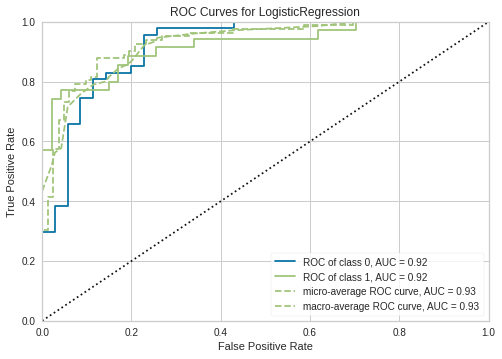

In [29]:
plot_model(tuned_lr, plot = 'auc')

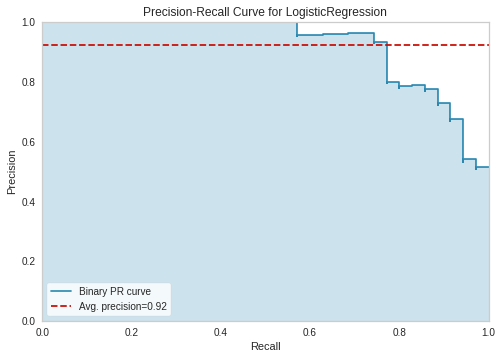

In [30]:
plot_model(tuned_lr, plot = 'pr')

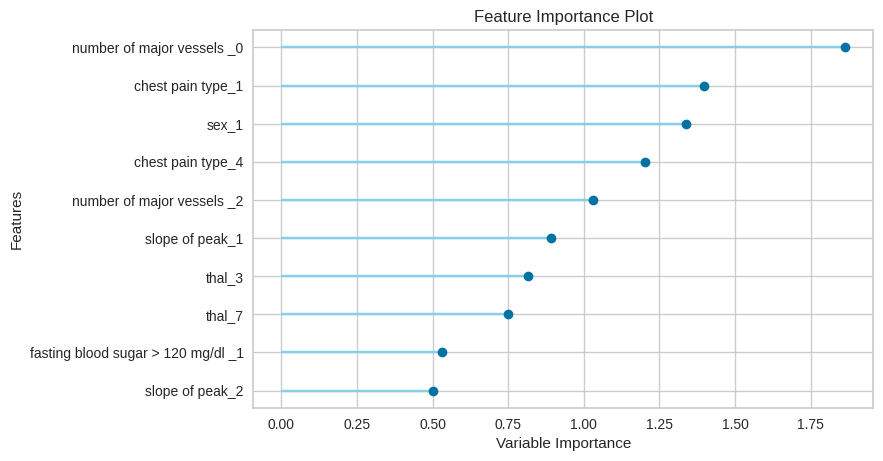

In [31]:
plot_model(tuned_lr, plot='feature')

### Finalize Model for Deployment

In [32]:
final_lr = finalize_model(tuned_lr)
#Final Random Forest model parameters for deployment
print(final_lr)

LogisticRegression(C=2.827, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7913, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [34]:
predict_model(final_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8902,0.9331,0.7714,0.9643,0.8571,0.7698,0.7824


### Save Model

In [35]:
save_model(final_lr,'Final LR Model 31Dic2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['sex',
                                                             'chest pain type',
                                                             'fasting blood '
                                                             'sugar > 120 '
                                                             'mg/dl ',
                                                             'resting '
                                                             'electrocardiographic '
                                                             'results',
                                                             'exercise induced '
                                                             'angina    ',
                                                             'thal'],
                                       display_types=True, features_todrop=[],
                                       id_